In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

### Reading in cleaned datasets

In [2]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_2/code'

In [3]:
ames = pd.read_pickle('../data/ames_clean.pkl')
ames_test = pd.read_pickle('../data/ames_test_clean.pkl')

In [4]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,1,0,0,0,0,0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,1,0


In [5]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,1,0,0,0,1,0,0,0,1,0
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,1,0
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,0
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,1,0,0


### Basic EDA 

_Some repeated from [data_cleaning_preprocessing notebook](/code/data_clean_preprocessing.ipynb)_

In [6]:
ames.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
Id,1.000000,0.175536,0.026354,-0.022524,0.032901,-0.061306,-0.026189,-0.063862,-0.090562,-0.035154,...,0.045172,0.007914,0.013252,0.049894,-0.077309,0.008276,0.028777,0.012576,0.037575,0.007692
PID,0.175536,1.000000,-0.003365,-0.083948,0.024526,-0.265056,0.106123,-0.346259,-0.176452,-0.246246,...,0.148073,0.075704,-0.023157,0.036047,-0.056989,0.068521,-0.021960,0.042474,0.050157,0.073190
MS SubClass,0.026354,-0.003365,1.000000,-0.363916,-0.245794,0.035285,-0.069696,0.035899,0.044089,-0.004195,...,-0.132423,0.011202,0.007813,0.001502,-0.063763,0.007957,-0.036315,-0.105610,0.001916,0.010379
Lot Frontage,-0.022524,-0.083948,-0.363916,1.000000,0.390141,0.183383,-0.050554,0.104691,0.081280,0.200435,...,-0.074350,0.030165,0.153771,0.046709,-0.177984,0.032559,-0.025979,-0.001155,-0.039689,0.031730
Lot Area,0.032901,0.024526,-0.245794,0.390141,1.000000,0.105408,-0.018777,0.035663,0.050381,0.168573,...,-0.092431,0.040880,0.226110,0.014013,-0.176109,0.043692,0.023448,0.009402,-0.069401,0.043410
Overall Qual,-0.061306,-0.265056,0.035285,0.183383,0.105408,1.000000,-0.081771,0.602635,0.584594,0.435729,...,-0.530551,-0.239883,0.286365,0.024625,-0.206507,-0.227902,-0.233644,-0.198297,-0.007188,-0.237516
Overall Cond,-0.026189,0.106123,-0.069696,-0.050554,-0.018777,-0.081771,1.000000,-0.370603,0.043564,-0.135131,...,0.303610,-0.073473,-0.057595,0.026976,0.102175,-0.080601,0.164854,0.069197,-0.020786,-0.078101
Year Built,-0.063862,-0.346259,0.035899,0.104691,0.035663,0.602635,-0.370603,1.000000,0.629989,0.327284,...,-0.719083,-0.102520,0.195455,-0.014081,-0.247409,-0.083487,-0.177461,-0.216870,-0.136077,-0.095687
Year Remod/Add,-0.090562,-0.176452,0.044089,0.081280,0.050381,0.584594,0.043564,0.629989,1.000000,0.210269,...,-0.566098,-0.145197,0.161643,0.011191,-0.169360,-0.129063,-0.233875,-0.239479,0.018675,-0.141542
Mas Vnr Area,-0.035154,-0.246246,-0.004195,0.200435,0.168573,0.435729,-0.135131,0.327284,0.210269,1.000000,...,-0.218024,-0.073180,0.222086,-0.009052,-0.159674,-0.069015,-0.039542,-0.067097,-0.138348,-0.072089


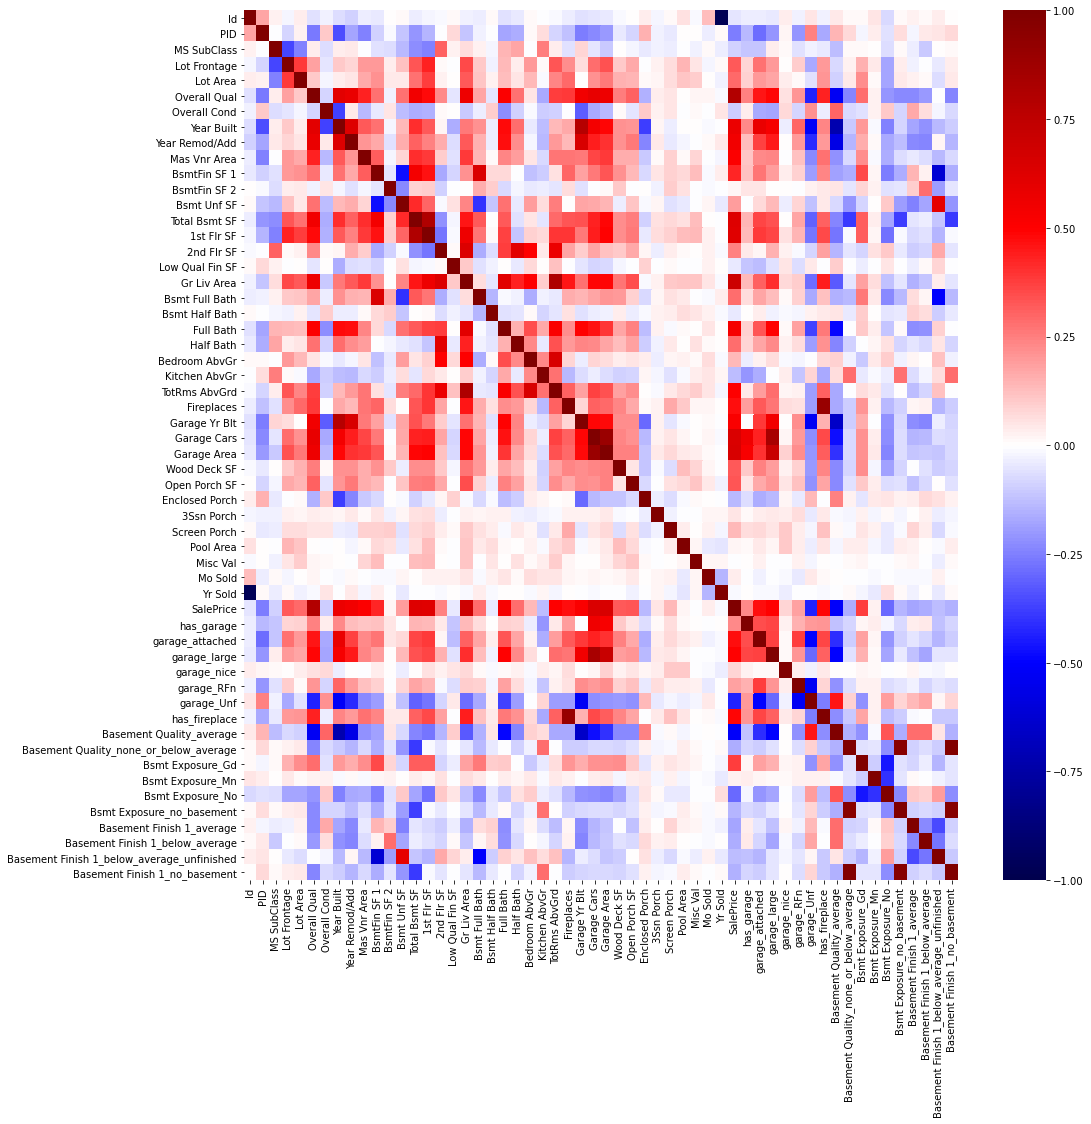

In [7]:
# giant heatmap to start visualizing correlations
plt.figure(figsize=(16,16))
sns.heatmap(ames.corr(), vmin=-1, vmax=1, cmap='seismic');

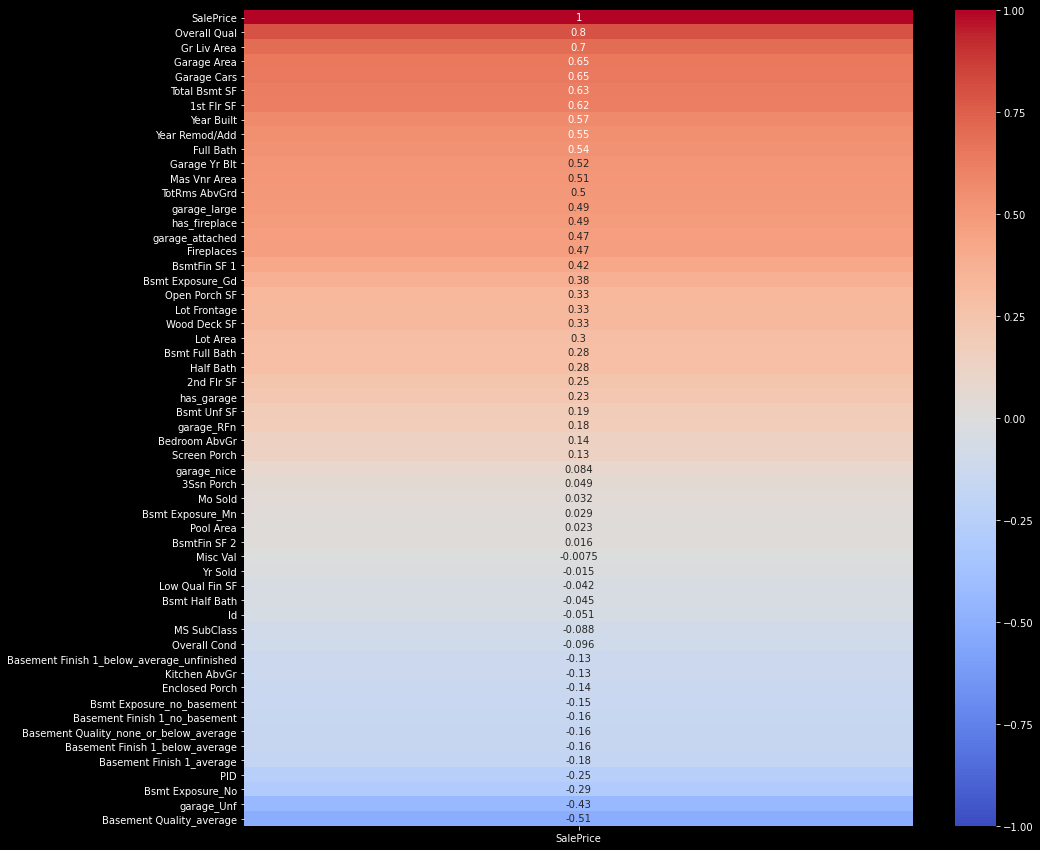

In [8]:
# Credit to John D Hazard for helping me make a more visually-pleasing heatmap 

plt.style.use('dark_background')  #dark background - easier to see
fig, ax = plt.subplots(figsize=(15, 15))  # make it larger!
plt.fontsize = 27                           # make the font more readable 
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),   
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);       # only care about correlation to Saleprice, so only mapping on that! 

In [9]:
# these columns are numeric columns

ames.describe().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'garage_attached', 'garage_large', 'garage_nice',
       'garage_RFn', 'garage_Unf', 'has_fireplace', 'Basement Quality_average',
       'Basement Quality_none_or_below_average', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'Bsmt Exposure_no_basement',
       'Basement Finish 1_average', 'Basement Finish 1_below_ave

In [10]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Basement Quality_average,Basement Quality_none_or_below_average,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_no_basement,Basement Finish 1_average,Basement Finish 1_below_average,Basement Finish 1_below_average_unfinished,Basement Finish 1_no_basement
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,1,0,0,0,0,0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,1,0,0,0,1,0


In [11]:
# turning numerical columns into a variable
num_cols = ames.describe().columns
num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'garage_attached', 'garage_large', 'garage_nice',
       'garage_RFn', 'garage_Unf', 'has_fireplace', 'Basement Quality_average',
       'Basement Quality_none_or_below_average', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'Bsmt Exposure_no_basement',
       'Basement Finish 1_average', 'Basement Finish 1_below_ave

In [12]:
continuous_cols = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

In [13]:
# These are discrete variables
discrete_cols = [x for x in num_cols if x not in continuous_cols]
discrete_cols

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf',
 'has_fireplace',
 'Basement Quality_average',
 'Basement Quality_none_or_below_average',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Exposure_no_basement',
 'Basement Finish 1_average',
 'Basement Finish 1_below_average',
 'Basement Finish 1_below_average_unfinished',
 'Basement Finish 1_no_basement']

In [14]:
# building pairplot using numeric columns from above 

xvars = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','SalePrice']

yvars = ['Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

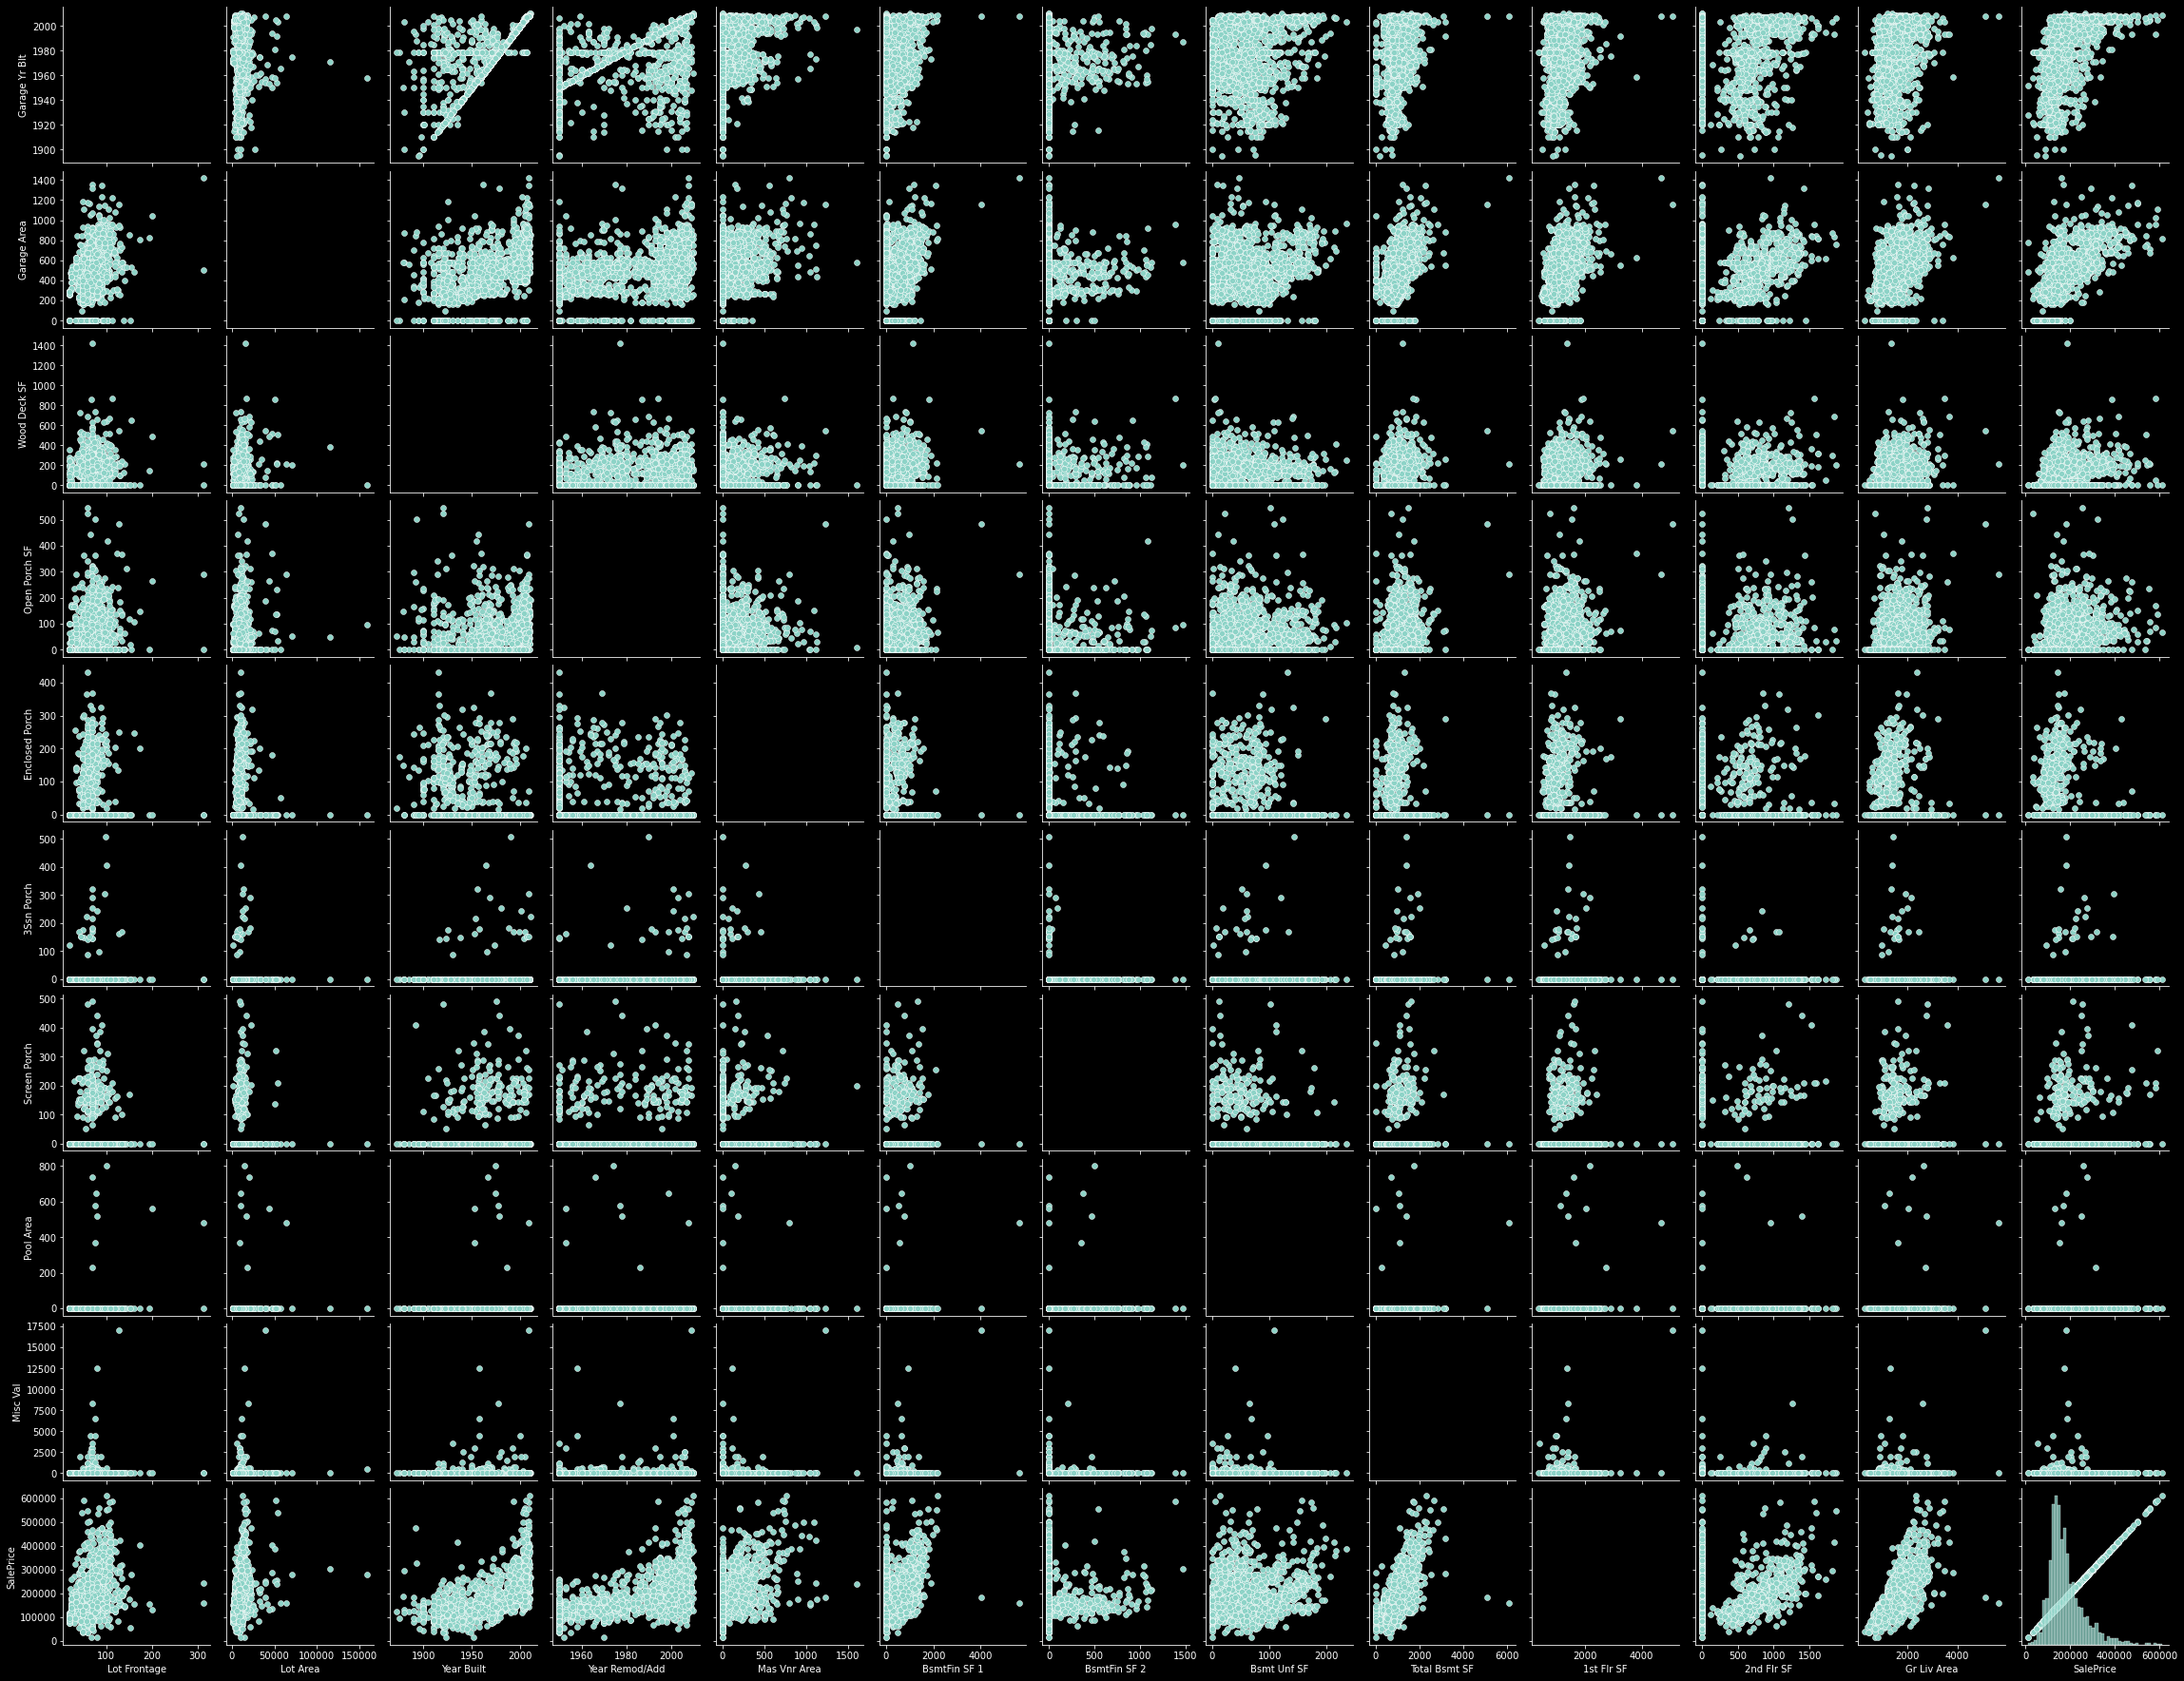

In [15]:
sns.pairplot(data=ames, x_vars=xvars, y_vars=yvars);

### Value Counts 

##### Value Counts for some Categorical variables:

_Duplicate to value counts in in `data_clean_preprocessing` notebook._

In [17]:
cat_features = ['MS SubClass', 'MS Zoning', 'Alley', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',\
                'Foundation', 'Bsmt Cond', 'Heating', 'Central Air', 'Electrical', 'Kitchen AbvGr', 'Kitchen Qual', 'Paved Drive', 'Fence',\
                'Misc Feature', 'Mo Sold', 'Sale Type']

nl = '\n'
for feature in cat_features: 
    print(f'Value Counts for {feature.upper()}:{nl}{ames[feature].value_counts()}')

Value Counts for MS SUBCLASS:
20     769
60     394
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
Value Counts for MS ZONING:
RL         1598
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Value Counts for ALLEY:
Grvl    85
Pave    55
Name: Alley, dtype: int64
Value Counts for STREET:
Pave    2042
Grvl       7
Name: Street, dtype: int64
Value Counts for LOT SHAPE:
Reg    1294
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Value Counts for LAND CONTOUR:
Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
Value Counts for UTILITIES:
AllPub    2047
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
Value Counts for LOT CONFIG:
Inside     1502
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Co

In [18]:
nulls = pd.DataFrame(ames.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Bsmt Exposure_no_basement,0
Basement Finish 1_average,0
Basement Finish 1_below_average,0
Basement Finish 1_below_average_unfinished,0


In [19]:
nulls_count = nulls[nulls[0]!=0]
nulls_count

,0
Alley,1909
Mas Vnr Type,22
Bsmt Full Bath,1
Bsmt Half Bath,1
Fireplace Qu,998
Garage Type,113
Garage Qual,113
Garage Cond,113
Pool QC,2040
Fence,1651


### Data Visualization

_Visualizations to see patterns that will potentially inspire other/different models. Otherwise looking at different compelling visuals to use in my presentation._

In [21]:
garage_cols = [col for col in ames.columns if 'garage' in col or 'Garage' in col]
garage_cols

['Garage Type',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf']

In [22]:
ames['Garage Type'].value_counts()

Attchd     1213
Detchd      534
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

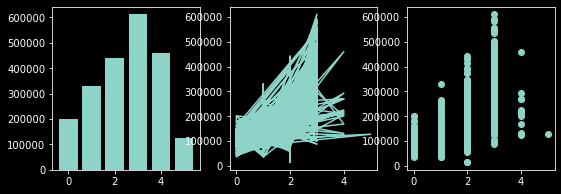

In [23]:
plt.figure(figsize=(9,3))

plt.subplot(131)
plt.bar(ames['Garage Cars'], ames['SalePrice'])
plt.subplot(132)
plt.plot(ames['Garage Cars'], ames['SalePrice'])
plt.subplot(133)
plt.scatter(ames['Garage Cars'], ames['SalePrice'])
plt.show() ; 

In [24]:
ames['garage_attached'].value_counts()

1.0    1391
0.0     658
Name: garage_attached, dtype: int64

In [25]:
ames.groupby('Garage Type')['SalePrice'].mean()

Garage Type
2Types     157184.210526
Attchd     205040.195383
Basment    143242.333333
BuiltIn    247883.522727
CarPort    103823.545455
Detchd     132197.286517
Name: SalePrice, dtype: float64

In [26]:
ames.groupby('Garage Cars')['SalePrice'].mean()

Garage Cars
0.0    105669.150442
1.0    126916.034417
2.0    184125.956866
3.0    309382.745247
4.0    229653.846154
5.0    126500.000000
Name: SalePrice, dtype: float64

In [27]:
ames['Garage Cars'].value_counts()

2.0    1136
1.0     523
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [28]:
ames.groupby('Garage Cond')['SalePrice'].mean()

Garage Cond
Ex    124000.000000
Fa    107387.957447
Gd    209030.833333
Po     89925.000000
TA    188270.396893
Name: SalePrice, dtype: float64

In [29]:
income_x_act.sort_values(by=['median_income'], inplace=True)

NameError: name 'income_x_act' is not defined

In [31]:
garage_quality = ames.groupby('Garage Qual')[['SalePrice']].mean()
garage_quality.sort_values(by=['SalePrice'], ascending=False, inplace=True)

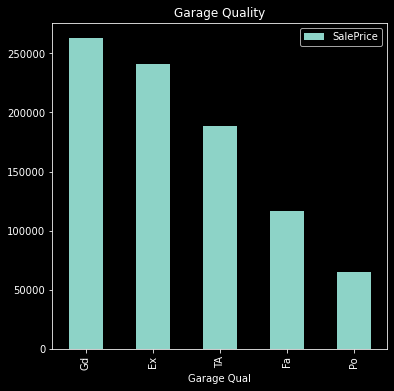

In [32]:
garage_quality.plot(
    kind='bar',
    title="Garage Quality",
    figsize=(6,6)
);
y_label='Sale Price'

In [33]:
garage_type = ames.groupby('Garage Type')[['SalePrice']].mean()
garage_type.sort_values(by=['SalePrice'], ascending=False, inplace=True)

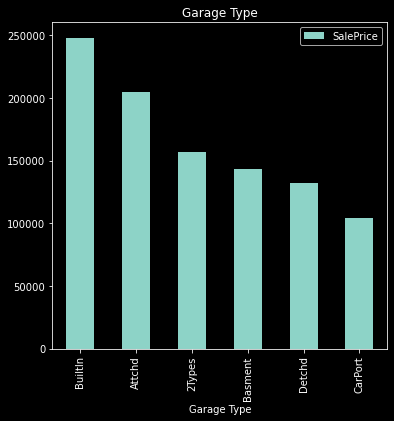

In [34]:
garage_type.plot(
    kind='bar',
    title="Garage Type",
    figsize=(6,6)
);
y_label='Sale Price'

In [35]:
garage_type_qual = ames.groupby(['Garage Type', 'Garage Qual'])[['SalePrice']].mean()
garage_type_qual.sort_values(by=['Garage Type','SalePrice'], ascending=False, inplace=True)

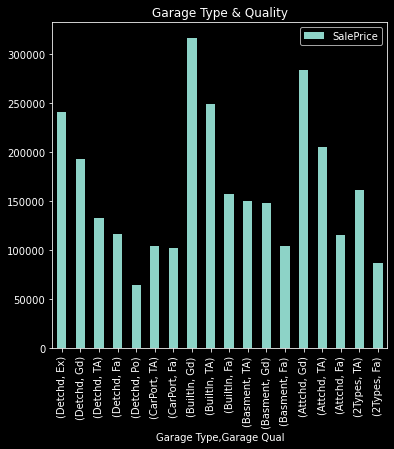

In [36]:
garage_type_qual.plot(
    kind='bar',
    title="Garage Type & Quality",
    figsize=(6,6)
);
y_label='Sale Price'

In [37]:
garage_car_count = ames.groupby(['Garage Cars'])[['SalePrice']].mean()
garage_car_count.sort_values(by=['SalePrice'], ascending=False)

,SalePrice
Garage Cars,
3.0,309382.745247
4.0,229653.846154
2.0,184125.956866
1.0,126916.034417
5.0,126500.000000
0.0,105669.150442


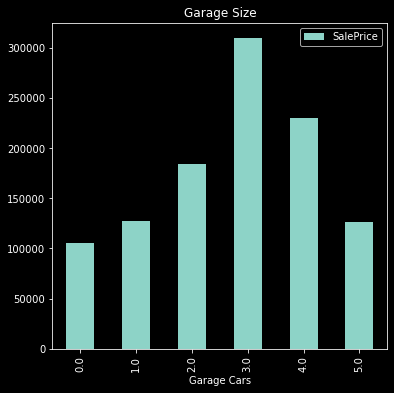

In [38]:
garage_car_count.plot(
    kind='bar',
    title="Garage Size",
    figsize=(6,6)
);
y_label='Sale Price'

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

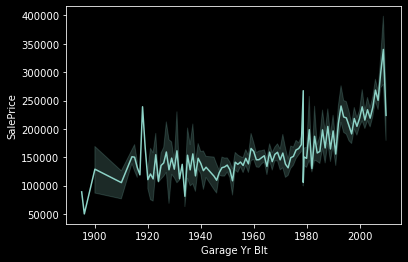

In [39]:
sns.lineplot(data=ames, x='Garage Yr Blt', y='SalePrice')

In [40]:
garage_year = ames.groupby(['Garage Yr Blt'])[['SalePrice']].mean()
garage_year

,SalePrice
Garage Yr Blt,
1895.0,89000.000000
1896.0,50138.000000
1900.0,128966.666667
1910.0,105300.000000
1914.0,150943.500000
...,...
2006.0,268374.312500
2007.0,250276.630952
2008.0,299296.727273


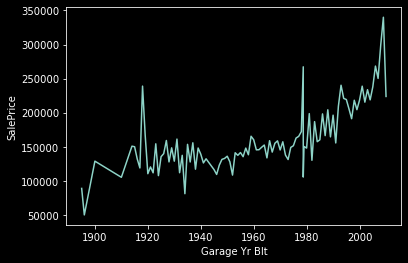

In [41]:
sns.lineplot(data=garage_year, x='Garage Yr Blt', y='SalePrice') ;

In [42]:
garage_year_count = ames.groupby(['Garage Yr Blt', 'Garage Cars'])[['SalePrice']].mean()
garage_year_count

SalePrice
Garage Yr Blt Garage Cars               
1895.0        1.0           89000.000000
1896.0        1.0           50138.000000
1900.0        1.0           86900.000000
              2.0          150000.000000
1910.0        1.0           96166.666667
...                                  ...
2008.0        3.0          333073.419355
2009.0        2.0          232462.250000
              3.0          435558.777778
2010.0        2.0          179781.000000
              3.0          267916.000000

[230 rows x 1 columns]

In [44]:
data = {'Population': [45775, 47198, 50731, 58965, 66258],
'Census_Year' : [1980, 1990, 2000, 2010, 2019]}

pop = pd.DataFrame(data)

pop

,Population,Census_Year
0,45775,1980
1,47198,1990
2,50731,2000
3,58965,2010
4,66258,2019


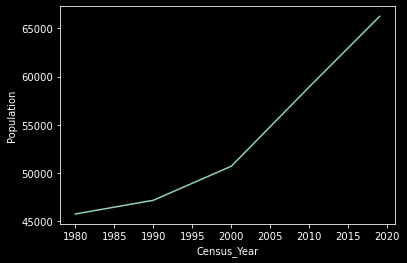

In [45]:
sns.lineplot(data=pop, x='Census_Year', y='Population', palette='blue') ;

In [46]:
# show that housing prices have bene increasing 

ames.groupby('Yr Sold')['SalePrice'].agg(['count','mean', 'min','max'])

,count,mean,min,max
Yr Sold,,,,
2006,438,179471.609589,35000,584500
2007,497,185594.162978,39300,591587
2008,434,181987.124424,13100,475000
2009,446,182455.244395,34900,582933
2010,234,174180.059829,12789,611657


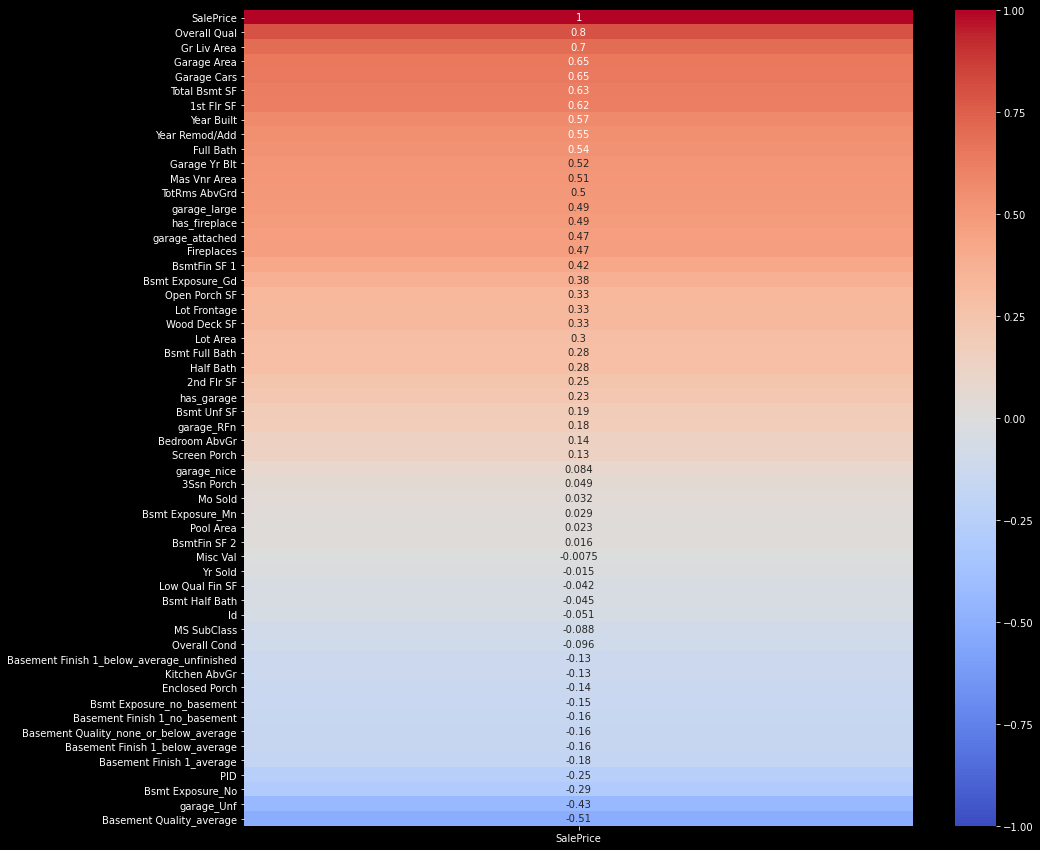

In [47]:
# REPEAT FROM ABOVE 

# Credit to John D Hazard for helping me make a more visually-pleasing heatmap 

plt.style.use('dark_background')  #dark background - easier to see
fig, ax = plt.subplots(figsize=(15, 15))  # make it larger!
plt.fontsize = 27                           # make the font more readable 
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),   
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);       # only care about correlation to Saleprice, so only mapping on that! 

In [50]:
basement_cols = [col for col in ames.columns if 'Bsmt' in col]
basement_cols

['Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Exposure_no_basement']

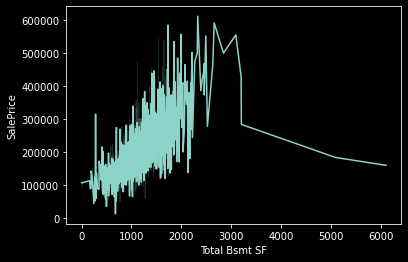

In [51]:
sns.lineplot(data=ames, x='Total Bsmt SF', y='SalePrice', palette='blue') ;

In [52]:
ames['Total Bsmt SF'].max()

6110.0

In [53]:
# replacing basement square feet outlier with mean 

ames['Total Bsmt SF'][ames['Total Bsmt SF']>5000] = ames['Total Bsmt SF'].mean()

<ipython-input-53-b3318cc16a23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames['Total Bsmt SF'][ames['Total Bsmt SF']>5000] = ames['Total Bsmt SF'].mean()


In [54]:
ames['Total Bsmt SF'].mean()

1053.6491800092465

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

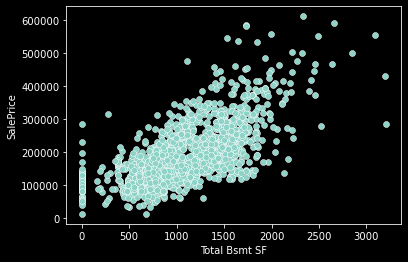

In [55]:
sns.scatterplot(data=ames, x='Total Bsmt SF', y='SalePrice')

In [56]:
base_qual_df = ames.groupby('Bsmt Qual')[['SalePrice']].mean()
base_qual_df.sort_values(by='SalePrice', ascending=False, inplace=True)

In [58]:
base_qual_df.reset_index(inplace=True)
base_qual_df

,index,Bsmt Qual,SalePrice
0,0,Ex,329506.619565
1,1,Gd,202597.406721
2,2,TA,139988.461105
3,3,Fa,107752.166667
4,4,no_basement,106847.666667
5,5,Po,89000.000000


In [59]:
# renaming values for sake of plot 
# ames['Bsmt Qual'] = ames['Bsmt Qual'].str.replace('Ex', 'Excellent')  ## OOPS

base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('Excellent', '100+')

In [60]:
base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('Gd', '90-99')
base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('TA', '80-89')
base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('Fa', '70-79')
base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('no_basement', 'No Basement')
base_qual_df['Bsmt Qual'] = base_qual_df['Bsmt Qual'].str.replace('Po', '<70')

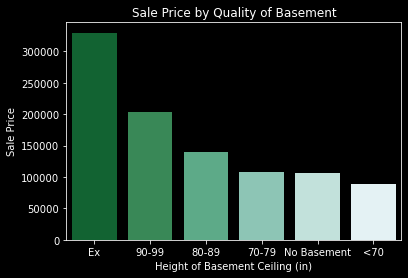

In [61]:
ax = sns.barplot(x=base_qual_df['Bsmt Qual'], y=base_qual_df['SalePrice'], palette='BuGn_r' )
ax.set(xlabel='Height of Basement Ceiling (in)', ylabel='Sale Price', title='Sale Price by Quality of Basement');

In [62]:
garage_car_count

,SalePrice
Garage Cars,
0.0,105669.150442
1.0,126916.034417
2.0,184125.956866
3.0,309382.745247
4.0,229653.846154
5.0,126500.000000


In [63]:
garage_car_count.reset_index()

,Garage Cars,SalePrice
0,0.0,105669.150442
1,1.0,126916.034417
2,2.0,184125.956866
3,3.0,309382.745247
4,4.0,229653.846154
5,5.0,126500.000000


In [64]:
# for some reason not working 

# ax = sns.barplot(x=garage_car_count['Garage Cars'], y=garage_car_count['SalePrice'], palette='BuGn_r' )
# ax.set(xlabel='Garage Capacity', ylabel='Sale Price', title='Sale Price by Garage Capacity');

In [65]:
garage_car_count = ames.groupby('Garage Cars')[['SalePrice']].mean()
garage_car_count.sort_values(by=['Garage Cars'], ascending=False, inplace=True)

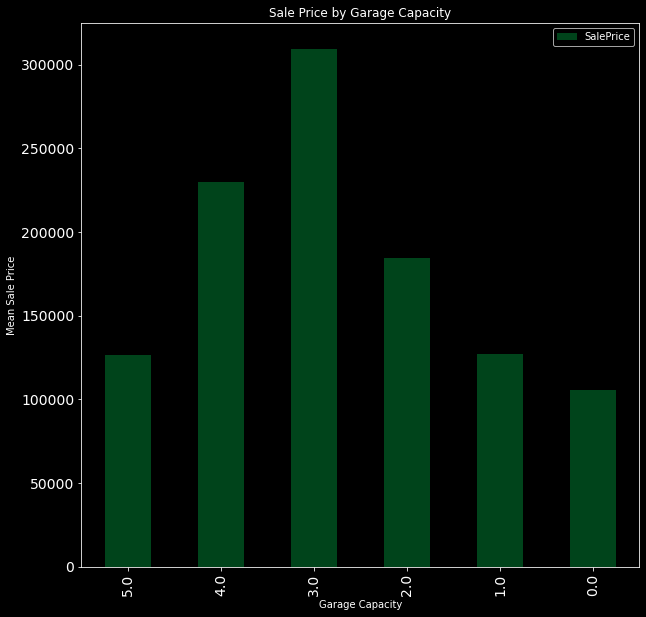

In [66]:
garage_car_count.plot(
    kind='bar',
    title="Sale Price by Garage Capacity",
    figsize=(10, 10),
    colormap='BuGn_r',
    xlabel='Garage Capacity',
    ylabel='Mean Sale Price',
    fontsize=14 
);
y_label='Average Sale Price'

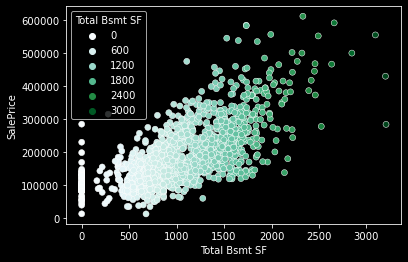

In [67]:
sns.scatterplot(data=ames, x='Total Bsmt SF', y='SalePrice', hue='Total Bsmt SF', palette="BuGn");

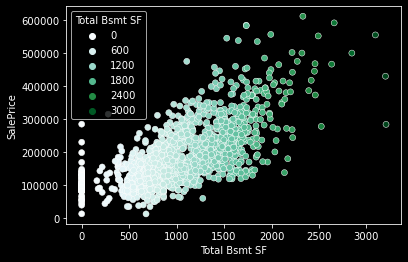

In [68]:
sns.scatterplot(data=ames, x='Total Bsmt SF', y='SalePrice', hue='Total Bsmt SF', palette="BuGn", x_bins=200);

In [69]:
garage_cols

['Garage Type',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf']

In [70]:
ames['Garage Type'].value_counts()

Attchd     1213
Detchd      534
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [71]:
gar_type_df = ames.groupby('Garage Type')[['SalePrice']].mean()
gar_type_df

,SalePrice
Garage Type,
2Types,157184.210526
Attchd,205040.195383
Basment,143242.333333
BuiltIn,247883.522727
CarPort,103823.545455
Detchd,132197.286517


In [73]:
gar_type_df.reset_index(inplace=True)

In [74]:
gar_type_df.sort_values(by='SalePrice', ascending=False, inplace=True)

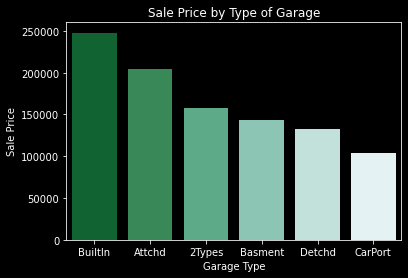

In [75]:
ax = sns.barplot(x=gar_type_df['Garage Type'], y=gar_type_df['SalePrice'], palette='BuGn_r' )
ax.set(xlabel='Garage Type', ylabel='Sale Price', title='Sale Price by Type of Garage');

In [76]:
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('BuiltIn', 'Built-In')

In [77]:
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('Attchd', 'Attached')
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('Basment', 'Basement')
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('2Types', 'Multi-type')
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('CarPort', 'Car Port')
gar_type_df['Garage Type'] = gar_type_df['Garage Type'].str.replace('Detchd', 'Detached')